@author: Antonio Rendon
* Aug-2023
* Linkedin: https://www.linkedin.com/in/antoniorendon/


# CENTRAL LIMIT THEOREM (CLT)

### What Is the Central Limit Theorem (CLT)?
In probability theory, the central limit theorem (CLT) states that the distribution of a sample variable approximates a normal distribution (i.e., a “bell curve”) as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population's actual distribution shape.

Put another way, CLT is a statistical premise that, given a sufficiently large sample size from a population with a finite level of variance, the mean of all sampled variables from the same population will be approximately equal to the mean of the whole population. Furthermore, these samples approximate a normal distribution, with their variances being approximately equal to the variance of the population as the sample size gets larger, according to the law of large numbers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Load the dataset
# This is a subset of the GSS dataset
raw=pd.read_csv(r'.\gss_clt.csv', low_memory=False)
df=raw.dropna()



In [3]:
#Show the first columns in our dataframe 
df.head()

,caseid,year,age,sex,race
0,1,1972,23.0,Female,White
1,2,1972,70.0,Male,White
2,3,1972,48.0,Female,White
3,4,1972,27.0,Female,White
4,5,1972,61.0,Female,White


In [4]:
#Showing some statistics
df.describe(include="all")

,caseid,year,age,sex,race
count,56859.000000,56859.000000,56859.000000,56859,56859
unique,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,Female,White
freq,NaN,NaN,NaN,31775,46208
mean,28538.907508,1992.089414,45.697955,NaN,NaN
std,16471.534950,11.724162,17.472112,NaN,NaN
min,1.000000,1972.000000,18.000000,NaN,NaN
25%,14279.500000,1983.000000,31.000000,NaN,NaN
50%,28547.000000,1993.000000,43.000000,NaN,NaN
75%,42798.500000,2002.000000,59.000000,NaN,NaN


In [5]:
#creating populations

#Male and Female populations
men = df[df['sex'] == 'Male']
women = df[df['sex'] == 'Female']


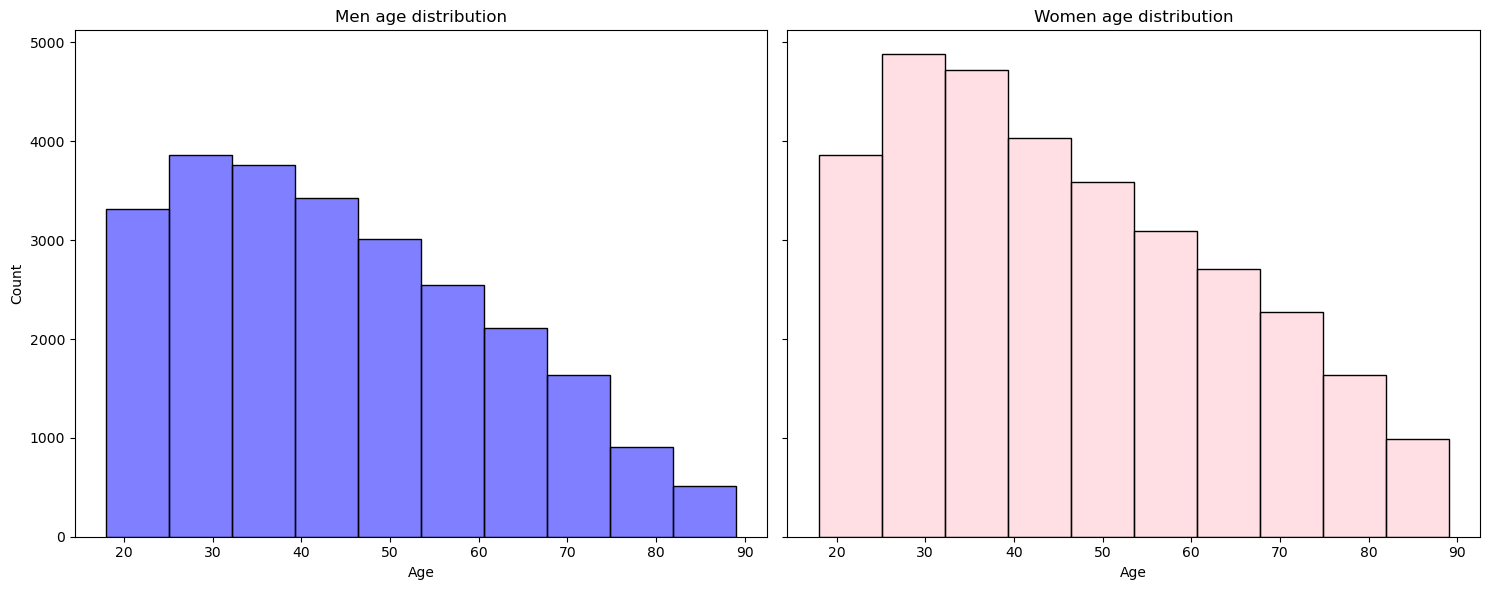

In [6]:
# Creating axes and fig

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Dibujando las distribuciones en gráficos separados
sns.histplot(men['age'], bins=10,  ax=ax[0], color='blue', alpha=0.5)
sns.histplot(women['age'], bins=10,  ax=ax[1], color='pink', alpha=0.5)

# Configurando títulos y etiquetas
ax[0].set_title('Men age distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[1].set_title('Women age distribution')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('count')

# Ajustando el layout
plt.tight_layout()

# Mostrando el gráfico
plt.show()


It looks like the frecuencies in both datasets are similar, both has the same shape

## Population Mean

Its time to calculate the mean age of population

In [43]:
#Poblational mean
population_mean_M = men['age'].mean()
population_mean_F = women['age'].mean()

print("Mean age of male population: ", population_mean_M)
print("Mean age of female population: ", population_mean_F)

Mean age of male population:  44.952519534364534
Mean age of female population:  46.28642014162077


## Sampling

What we will do is:

* Obtain a sample of size N from each of our data set
* Calculate the mean of 'age' from that sample
* Print the mean

In [11]:
    sample_men = men['age'].sample(n=100, replace=True, random_state=42)  # Obtain a sample of 100 rows with replace 
    sample_women = women['age'].sample(n=100, replace=True, random_state=42)  # Obtain a sample of 100 rows with replace 
    
    mean_age_men = sample_men.mean()  # Calculate the mean 
    mean_age_women = sample_women.mean()  # Calculate the mean 

    print(f"Sample mean age for MALE  : {mean_age_men:.2f}")  # Print the MEAN with 2 decimal
    print(f"Sample mean age for FEMALE: {mean_age_women:.2f}")  # Print the MEAN with 2 decimal


Sample mean age for MALE  : 46.93
Sample mean age for FEMALE: 42.78


___
The obtained values show noticeable differences from the population means. 
To effectively test the Central Limit Theorem, a substantial increase in sample size is necessary. We'll employ a loop to automate and replicate the previously mentioned steps, storing each sample mean in an array for further analysis.

___

Let's proceed by creating a script that repeats the experiment with various sample sizes. For each, we'll overlay a reference line to indicate the population mean

___

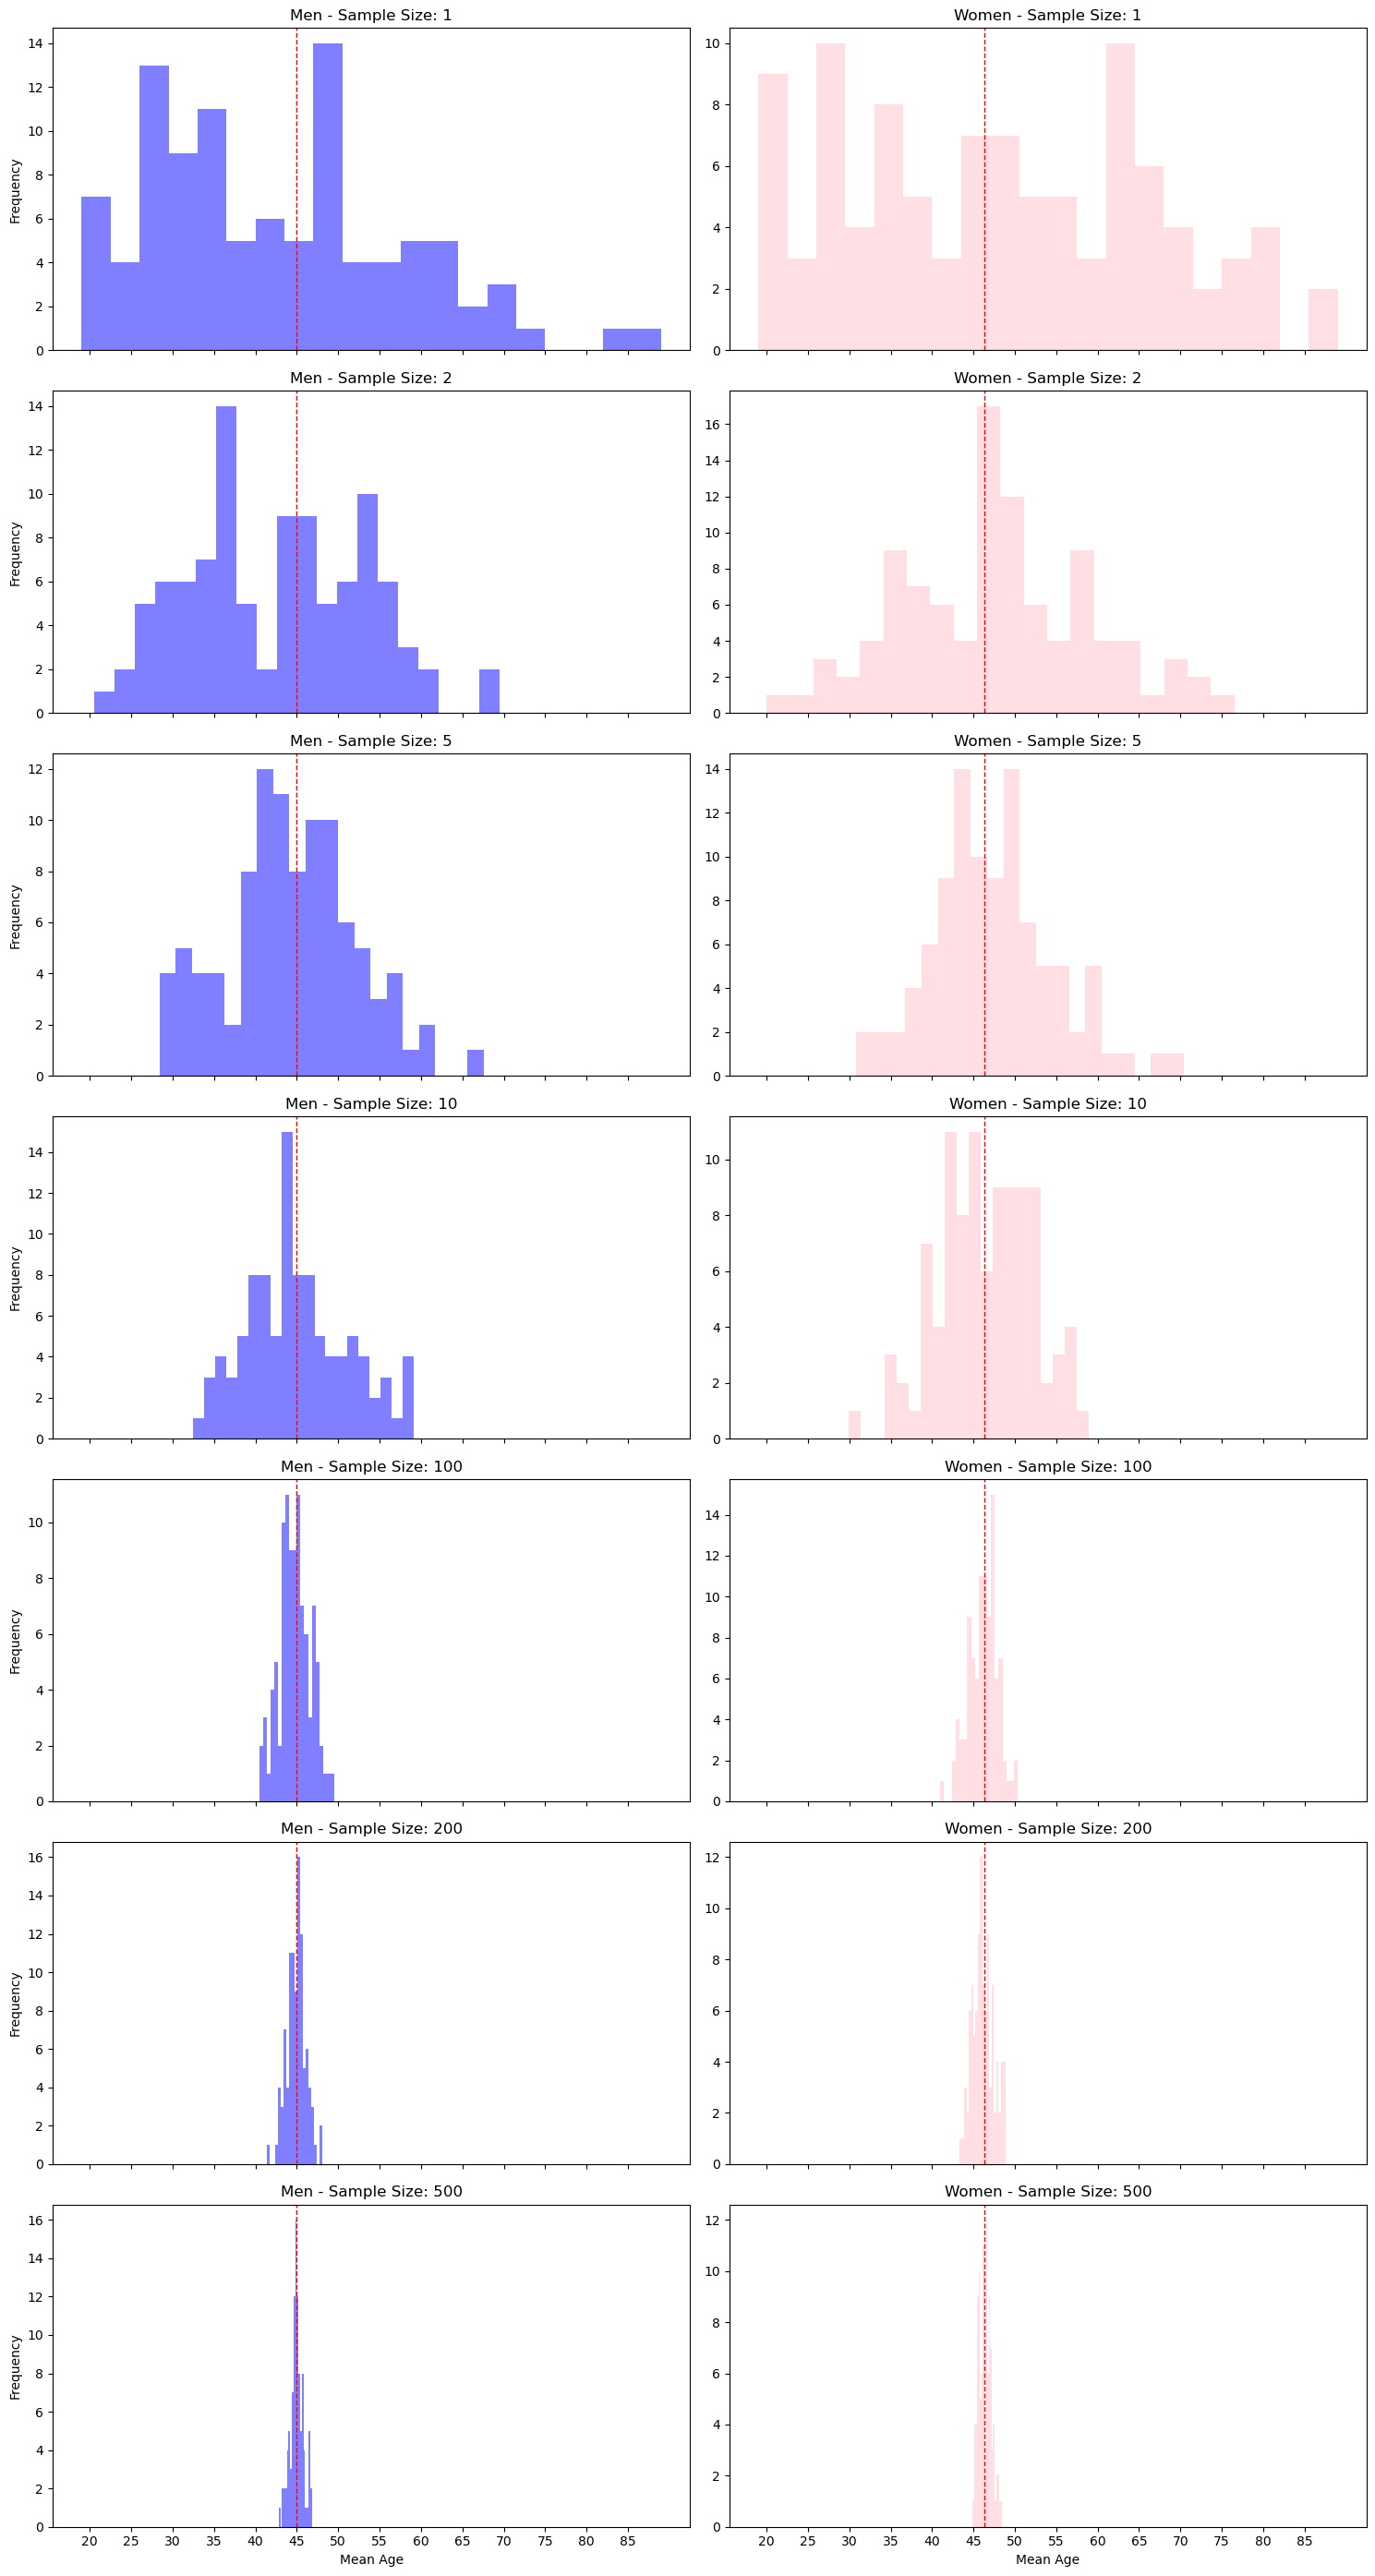

In [65]:
n = [1, 2, 5, 10, 100, 200, 500] # Sample sizes
N = 100  # Number of samples

# Initializing lists to store means for each sample size
mean_ages_M = [[] for _ in n]
mean_ages_F = [[] for _ in n]

for idx, size in enumerate(n):
    for i in range(N):
        sample_M = men['age'].sample(size, replace=True, random_state=i)
        sample_F = women['age'].sample(size, replace=True, random_state=i)
        
        mean_ages_M[idx].append(sample_M.mean())    
        mean_ages_F[idx].append(sample_F.mean())    

# Creating subplots
fig, axs = plt.subplots(len(n), 2, figsize=(15, 4*len(n)), sharex=True)

for idx, size in enumerate(n):
    axs[idx, 0].hist(mean_ages_M[idx], bins=20, color="blue", label="Men", alpha=0.5)
    axs[idx, 1].hist(mean_ages_F[idx], bins=20, color="pink", label="Women", alpha=0.5)
    
    axs[idx, 0].set_title(f"Men - Sample Size: {size}")
    axs[idx, 1].set_title(f"Women - Sample Size: {size}")

    
    # Líneas de referencia para las medias poblacionales
    axs[idx, 0].axvline(population_mean_M, color='red', linestyle='dashed', linewidth=1, label='Population Mean')
    axs[idx, 1].axvline(population_mean_F, color='red', linestyle='dashed', linewidth=1, label='Population Mean')

# Setting common labels
for ax in axs[-1]:
    ax.set_xlabel("Mean Age")

for ax in axs[:, 0]:
    ax.set_ylabel("Frequency")

plt.xticks(np.arange(20, 90, 5))

plt.tight_layout()
plt.show()


## Key Takeaways


* As we observe, the larger the sample size, the more the histograms take on a bell shape and converge towards the population mean
* Regardless of the shape of the population distribution, the distribution of the sample means increasingly approaches a normal distribution
* As the sample size, __n__ , becomes exceedingly large, the distribution of the sample means tends to converge into a near-straight line that aligns closely with the population mean reference line. However, it's worth noting that beyond a certain point, an excessively large __n__ may not offer additional insight. This is because the distribution becomes so narrow that it provides limited information about the variability or spread of the sample means. In practical scenarios, selecting an optimally sized sample is crucial to balance the trade-off between obtaining a good estimate and the cost or feasibility of collecting such a sample.

## References:

Ganti, A. (2023). Central Limit Theorem (CLT): definition and key characteristics. Investopedia. https://www.investopedia.com/terms/c/central_limit_theorem.asp

Abellán, J. L. (2021). Teorema Central del Límite (TCL). Economipedia. https://economipedia.com/definiciones/teorema-central-del-limite.html